# Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.0.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('data/two/train')
DATASET_PATH  = 'data/two/train'
TEST_DIR =  'data/two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.00001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.3,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 91 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten,Dropout, GlobalAveragePooling2D,AveragePooling2D
from tensorflow.keras.layers import Input
import numpy as np


base_model = VGG16(weights='imagenet',include_top=False, input_tensor=Input(shape=(224, 224,3)))
x = base_model.output
x = Flatten()(x)
x = Dense(128, name="dense_feature", activation="relu")(x)
x = Dropout(0.25)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()


for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'],learning_rate=.0001)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Building Model


#### Training Model

In [5]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))
#
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

history = model.fit(train_batches, steps_per_epoch=STEP_SIZE_TRAIN, validation_data = valid_batches, validation_steps=STEP_SIZE_VALID, epochs = 40)

10
4


/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Train for 9 steps, validate for 3 steps
Epoch 1/40


/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/gsirio/anaconda3/envs/tf-cpu-440/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/9 [==============================] - 11s 1s/step - loss: 0.7884 - accuracy: 0.6049 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 2/40
9/9 [==============================] - 10s 1s/step - loss: 0.4977 - accuracy: 0.8333 - val_loss: 0.3474 - val_accuracy: 0.8000
Epoch 3/40
9/9 [==============================] - 10s 1s/step - loss: 0.5775 - accuracy: 0.8025 - val_loss: 0.1206 - val_accuracy: 0.9333
Epoch 4/40
9/9 [==============================] - 10s 1s/step - loss: 0.4070 - accuracy: 0.8025 - val_loss: 0.0751 - val_accuracy: 1.0000
Epoch 5/40
9/9 [==============================] - 10s 1s/step - loss: 0.3544 - accuracy: 0.8519 - val_loss: 0.1194 - val_accuracy: 0.9667
Epoch 6/40
9/9 [==============================] - 10s 1s/step - loss: 0.1727 - accuracy: 0.9259 - val_loss: 0.1144 - val_accuracy: 0.9333
Epoch 7/40
9/9 [==============================] - 9s 1s/step - loss: 0.1883 - accuracy: 0.9259 - val_loss: 0.0840 - val_accuracy: 0.9667
Epoch 8/40
9/9 [==============================

#### Accuracy and Loss During Training Plots

In [111]:
#Colors for Plots
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   


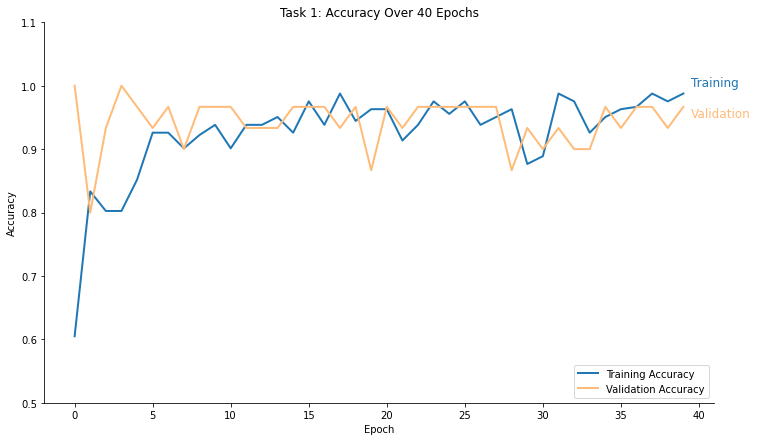

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 


plt.plot(history.history['accuracy'], color=tableau20[0],linewidth=2,label='Training Accuracy')
plt.text(39.5, 1,"Training",color=tableau20[0],fontsize=12)
plt.plot(history.history['val_accuracy'], color=tableau20[3],linewidth=2,label = 'Validation Accuracy')
plt.text(39.5, .95,"Validation",color=tableau20[3],fontsize=12)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Task 1: Accuracy Over 40 Epochs')
plt.ylim([.5, 1.1])
plt.legend(loc='lower right')
 


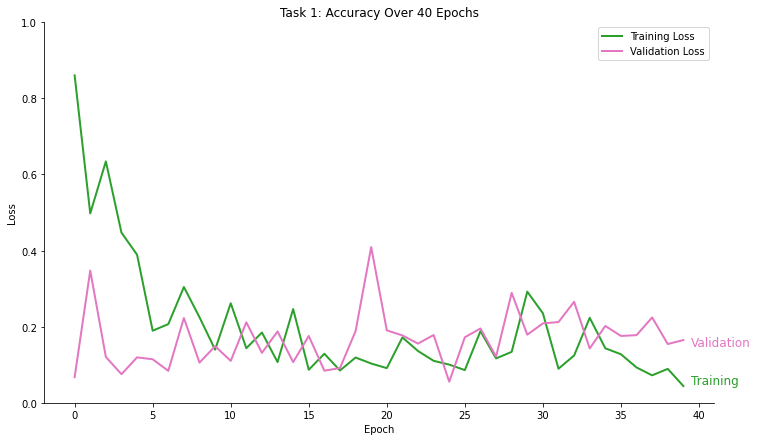

In [115]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 


plt.plot(history.history['loss'], color=tableau20[4],linewidth=2,label='Training Loss')
plt.text(39.5, .05,"Training",color=tableau20[4],fontsize=12)
plt.plot(history.history['val_loss'], color=tableau20[12],linewidth=2,label = 'Validation Loss')
plt.text(39.5, .15,"Validation",color=tableau20[12],fontsize=12)




plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Task 1: Accuracy Over 40 Epochs')
plt.ylim([.0, 1])
plt.legend(loc='upper right')
 

Found 18 images belonging to 2 classes.
18/18 [==============================] - 6s 330ms/step
covid/nejmoa2001191_f3-PA.jpeg


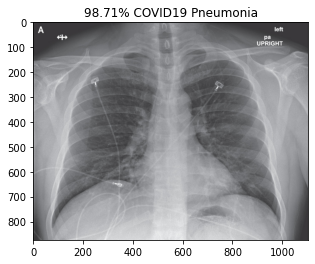

covid/nejmoa2001191_f4.jpeg


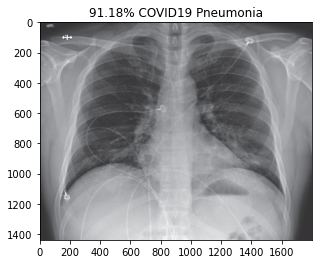

covid/nejmoa2001191_f5-PA.jpeg


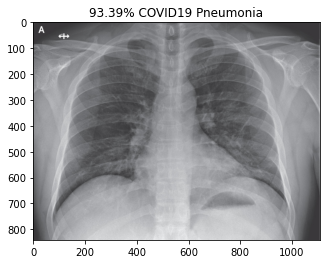

covid/radiol.2020200490.fig3.jpeg


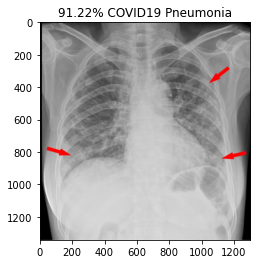

covid/ryct.2020200028.fig1a.jpeg


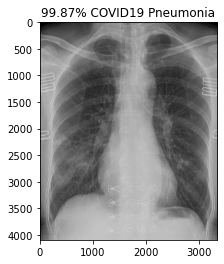

covid/ryct.2020200034.fig2.jpeg


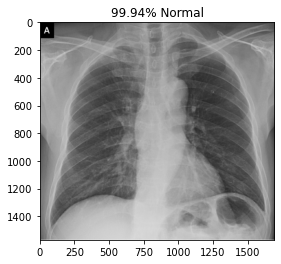

covid/ryct.2020200034.fig5-day0.jpeg


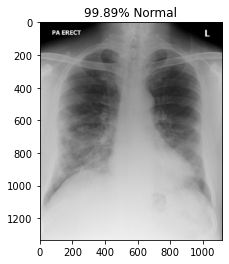

covid/ryct.2020200034.fig5-day4.jpeg


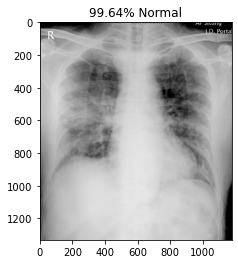

covid/ryct.2020200034.fig5-day7.jpeg


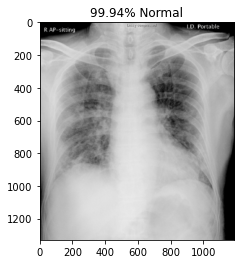

normal/NORMAL2-IM-1385-0001.jpeg


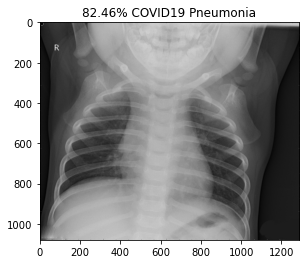

normal/NORMAL2-IM-1396-0001.jpeg


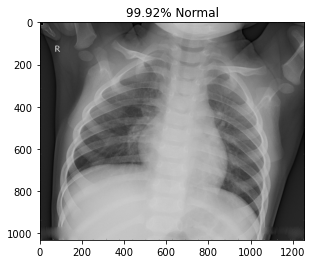

normal/NORMAL2-IM-1400-0001.jpeg


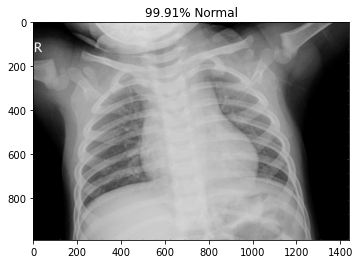

normal/NORMAL2-IM-1401-0001.jpeg


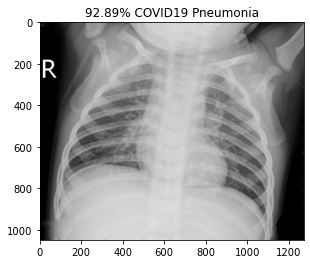

normal/NORMAL2-IM-1406-0001.jpeg


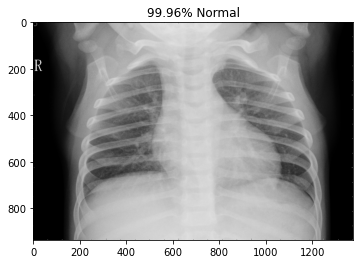

normal/NORMAL2-IM-1412-0001.jpeg


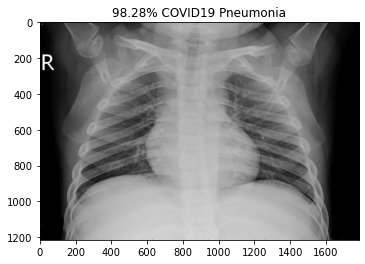

normal/NORMAL2-IM-1419-0001.jpeg


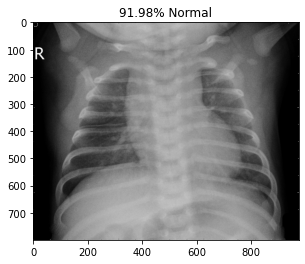

normal/NORMAL2-IM-1422-0001.jpeg


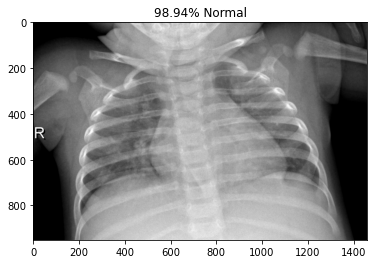

normal/NORMAL2-IM-1423-0001.jpeg


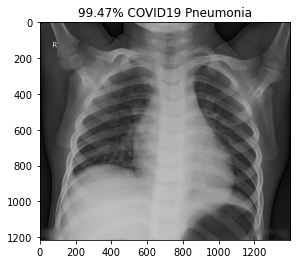

In [107]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

#### Plot Test Results

##  TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, I extracted features from the penultimate deep layer of the architecture,and used t-SNE to reduce the dimensionality of the extracted features to 2 dimensions and plotted the resulting 2D features.
https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [108]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)

tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
filenames = tsne_data_generator.filenames
labels = tsne_data_generator.labels

predictgen=intermediate_layer_model.predict_generator(tsne_data_generator,steps=len(filenames))

tsne_vect =TSNE(n_components=2, random_state=0).fit_transform(predictgen)



Found 130 images belonging to 2 classes.


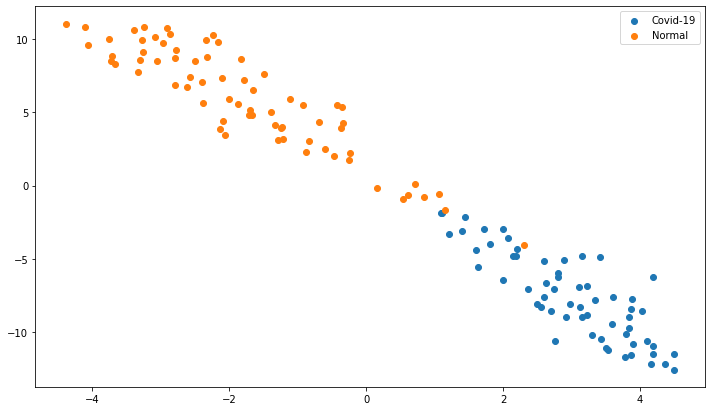

In [112]:
names = ['Covid-19', 'Normal']
plt.figure(figsize=(12, 7))
for i in range(2):
    X_label = tsne_vect[np.where(labels == i)]
    #print(X_label)
    plt.scatter(X_label[:,0], X_label[:,1],label=names[i])
plt.legend()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->